In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode , plot, iplot
init_notebook_mode(connected=True)

In [8]:
tesla = pd.read_csv('tesla.csv')

In [9]:
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-29,259.933319,264.500000,256.893341,260.436676,260.436676,62828700
1,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000
2,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200
3,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900
4,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800


In [10]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [11]:
tesla['Date']=pd.to_datetime(tesla['Date'])

In [14]:
print(f'Dataframe contains stock prices between {tesla.Date.min()} to {tesla.Date.max()}')
print(f'Total days = {(tesla.Date.max()-tesla.Date.min()).days}days')

Dataframe contains stock prices between 2021-09-29 00:00:00 to 2022-09-29 00:00:00
Total days = 365days


In [16]:
tesla.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,253,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,2022-03-30 09:23:28.695652096,300.136008,307.486021,292.114058,299.709104,299.709104,8.050938e+07
min,2021-09-29 00:00:00,207.949997,217.973328,206.856674,209.386673,209.386673,3.504270e+07
25%,2021-12-29 00:00:00,266.513336,273.166656,260.723328,266.923340,266.923340,6.255570e+07
50%,2022-03-30 00:00:00,298.500000,303.709991,289.130005,296.666656,296.666656,7.695630e+07
75%,2022-06-30 00:00:00,335.600006,344.950012,327.510010,336.336670,336.336670,9.347310e+07
max,2022-09-29 00:00:00,411.470001,414.496674,405.666656,409.970001,409.970001,1.885563e+08
std,NaN,46.139272,46.789896,44.685331,45.788283,45.788283,2.546595e+07


<Axes: >

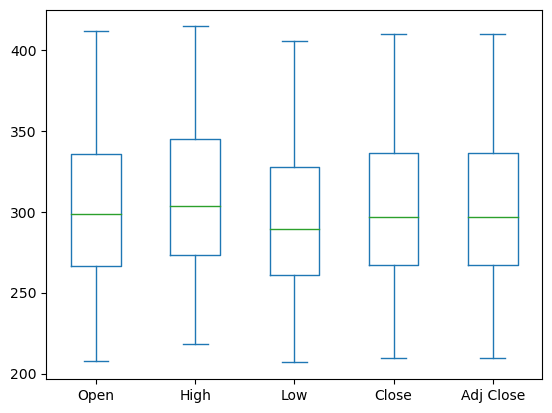

In [18]:
tesla[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [35]:
layout = go.Layout(
 title = 'Stock Price Prediction of Tesla',
 xaxis = dict (
   title = 'Date',
   titlefont = dict (
     family = 'Courier New, monospace',
     size = 18,
     color = 'black'
   )
 ),
 yaxis = dict (
   title = 'Price',
   titlefont = dict(
     family = 'Courier New, monospace' ,
     size = 18,
     color = 'black'
   )
 )
)

tesla_data = [{'x':tesla['Date'], 'y':tesla ['Close']}]
plot = go.Figure(data = tesla_data, layout=layout)

In [36]:
iplot(plot)

In [37]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [38]:
X = np.array(tesla.index).reshape(-1,1)
Y = tesla['Close']
X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size=3, random_state=101)

In [40]:
scaler = StandardScaler().fit(X_train)

In [43]:
from sklearn.linear_model import LinearRegression

In [46]:
lm=LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [49]:
trace0 = go.Scatter(
 x = X_train.T[0],
 y = Y_train,
 mode = 'markers',
 name = 'Actual'
)
trace1 = go.Scatter(
 x=X_train.T[0],
 y=lm.predict(X_train).T,
 mode ='lines',
 name = 'Predicted'
)
tesla_data = [trace0,trace1]
layout.xaxis.title.text ='Day'
plot2 = go.Figure (data=tesla_data, layout=layout)

In [56]:
iplot(plot2)

In [58]:
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test,lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train,lm.predict(X_train))}\t{mse(Y_test,lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.23964597798965404	0.34393608796368214
MSE       1578.815516737168	1799.6736795000313

